In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
import matplotlib.patches as patches


In [10]:
# improve:
## - Any type of SWOT grid size: 2km, 1km, 500m...
def noband(SSH_model, SSH_obs, lon, lat):
    """
    adaf
    """
    size_obs = SSH_obs.shape #before ss4
    dlon = np.diff(lon[30,:])  # 30 = arbitrary row (indices will be the same for the rest of the rows)
    #before dl4
    
    if (np.any(dlon>0.03)): #  if the half-swath trail present in the pass there will be 2 longitude jumps of ~0.1 instead of all ~0.02
            ff = np.ma.masked_all((size_obs[0], 4))
            
            SSH_modelnb = np.ma.empty((size_obs[0], size_obs[1]+8))
            SSH_modelnb[:, 0:26] = SSH_model[:, 0:26]  # HAVE TO PUT ONE EXTRA INDEX WHEN DOING A RANGE 
            SSH_modelnb[:, 26:30] = ff[:]
            SSH_modelnb[:, 30] = SSH_model[:, 26]
            SSH_modelnb[:, 31:35] = ff[:]
            SSH_modelnb[:, 35::] = SSH_model[:, 27::]
            SSH_modelnb[:, -1] = SSH_model[:, -1]
            
            SSH_obsnb = np.ma.empty((size_obs[0], size_obs[1]+8))
            SSH_obsnb[:, 0:26] = SSH_obs[:, 0:26]  # HAVE TO PUT ONE EXTRA INDEX WHEN DOING A RANGE 
            SSH_obsnb[:, 26:30] = ff[:]
            SSH_obsnb[:, 30] = SSH_obs[:, 26]
            SSH_obsnb[:, 31:35] = ff[:]
            SSH_obsnb[:, 35::] = SSH_obs[:, 27::]
            SSH_obsnb[:, -1] = SSH_obs[:, -1]

            lonnb = np.ma.empty((size_obs[0], size_obs[1]+8))
            lonnb[:, 0:26] = lon[:, 0:26]
            lonnb[:, 26:30] = lon.max()-2  #ff[:]       
            lonnb[:, 30] = lon[:, 26]
            lonnb[:, 31:35] = lon.max()-2  #ff[:]
            lonnb[:, 35::] = lon[:, 27::]
            lonnb[:, -1] = lon[:, -1]

            latnb = np.ma.empty((size_obs[0], size_obs[1]+8))
            latnb[:, 0:26] = lat[:, 0:26]
            latnb[:, 26:30] = lat.max()-2 #ff[:]       
            latnb[:, 30] = lat[:, 26]
            latnb[:, 31:35] = lat.max()-2  # ff[:]
            latnb[:, 35::] = lat[:, 27::]
            latnb[:, -1] = lat[:, -1]
            
    elif (np.any(dlon<-0.03)): #  if the half-swath trail present in the pass there will be 2 longitude jumps of ~0.1 instead of all ~0.02
            ff = np.ma.masked_all((size_obs[0], 4))
            
            SSH_modelnb = np.ma.empty((size_obs[0], size_obs[1]+8))
            SSH_modelnb[:, 0:26] = SSH_model[:, 0:26]  # HAVE TO PUT ONE EXTRA INDEX WHEN DOING A RANGE 
            SSH_modelnb[:, 26:30] = ff[:]
            SSH_modelnb[:, 30] = SSH_model[:, 26]
            SSH_modelnb[:, 31:35] = ff[:]
            SSH_modelnb[:, 35::] = SSH_model[:, 27::]
            SSH_modelnb[:, -1] = SSH_model[:, -1]
            
            SSH_obsnb = np.ma.empty((size_obs[0], size_obs[1]+8))
            SSH_obsnb[:, 0:26] = SSH_obs[:, 0:26]  
            SSH_obsnb[:, 26:30] = ff[:]
            SSH_obsnb[:, 30] = SSH_obs[:, 26]
            SSH_obsnb[:, 31:35] = ff[:]
            SSH_obsnb[:, 35::] = SSH_obs[:, 27::]
            SSH_obsnb[:, -1] = SSH_obs[:, -1]

            lonnb = np.ma.empty((size_obs[0], size_obs[1]+8))
            lonnb[:, 0:26] = lon[:, 0:26]
            lonnb[:, 26:30] = lon.max()-2  #ff[:]       
            lonnb[:, 30] = lon[:, 26]
            lonnb[:, 31:35] = lon.max()-2  #ff[:]
            lonnb[:, 35::] = lon[:, 27::]
            lonnb[:, -1] = lon[:, -1]

            latnb = np.ma.empty((size_obs[0], size_obs[1]+8))
            latnb[:, 0:26] = lat[:, 0:26]
            latnb[:, 26:30] = lat.max()-2 #ff[:]       
            latnb[:, 30] = lat[:, 26]
            latnb[:, 31:35] = lat.max()-2  # ff[:]
            latnb[:, 35::] = lat[:, 27::]
            latnb[:, -1] = lat[:, -1]

    else:  # leave SSH_obs, lon and lat as they are
            SSH_modelnb = SSH_model       
            SSH_obsnb = SSH_obs       
            lonnb = lon        
            latnb = lat
            
    return SSH_modelnb, SSH_obsnb, lonnb, latnb


http://www.aviso.altimetry.fr/en/missions/future-missions/swot/orbit.html

# Load txt file: (obtained from link above)

In [11]:
to = np.loadtxt('/Users/laura/Documents/data/ephem_calval_june2015_sph.txt')

In [12]:
lon = to[:,1]
lat = to[:,2]

# Change lon from 0, 360 to -180, 180 format:

In [16]:
lon2 = lon - 180

# Load swath SWOT data for fast-sampling phase in the western Mediterranean Sea:

In [17]:
directory = '/Users/laura/src/git/swotsimulator/swotoutput/FASTtest02/'

myfiles = sorted(glob.glob(directory + 'MEDtest_swotFAST_c01*.nc'))

In [18]:
myfile = myfiles[0]

nc = Dataset(myfile)
lonf = nc.variables['lon'][:]
latf = nc.variables['lat'][:]
tim = nc.variables['time'][:]
SSH_obs = nc.variables['SSH_obs'][:]
SSH_model = nc.variables['SSH_model'][:]
nc.close()

lonf[lonf > 180] -= 360

_, _, lonnb, latnb = noband(SSH_model, SSH_obs,lonf,latf)

In [19]:
myfile = myfiles[1]

nc = Dataset(myfile)
lonf = nc.variables['lon'][:]
latf = nc.variables['lat'][:]
tim = nc.variables['time'][:]
SSH_obs = nc.variables['SSH_obs'][:]
SSH_model = nc.variables['SSH_model'][:]
nc.close()

lonf[lonf > 180] -= 360

_, _, lonnb2, latnb2 = noband(SSH_model, SSH_obs, lonf,latf)

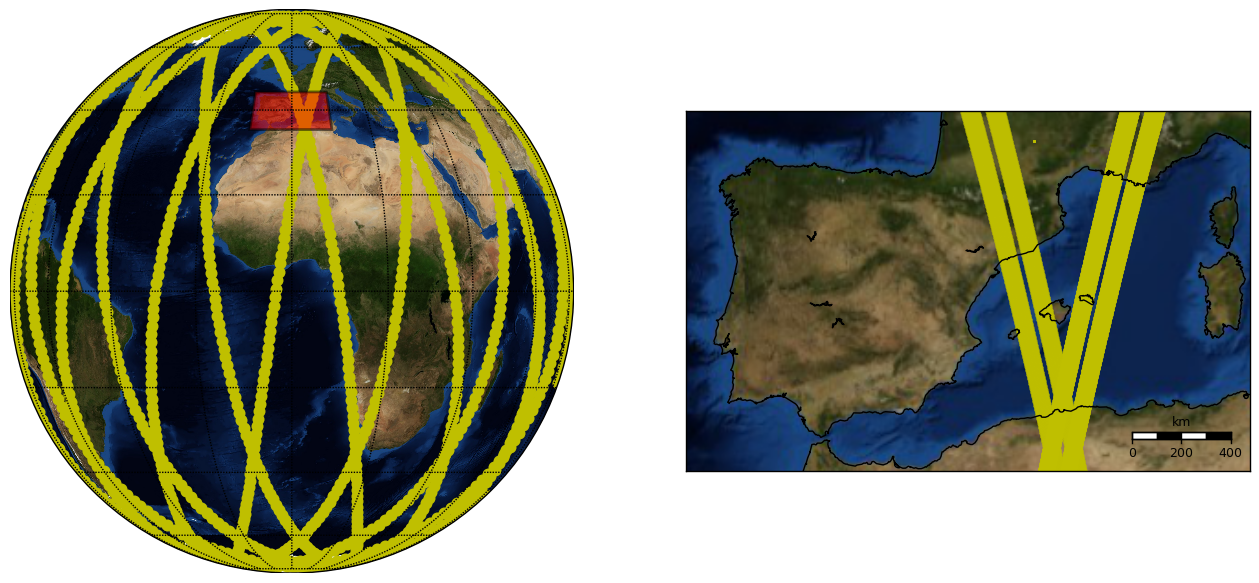

In [36]:
# to do the box
blomin = -10.5
blomax = 10
blamin = 35
blamax = 45

# Map
lomin = -90
lomax = 90
lamin = -80
lamax = 80

fig1 = plt.figure(figsize=(16, 10))  # (w,h)
ax1 = plt.subplot2grid((1,2), (0,0))
ax2 = plt.subplot2grid((1,2), (0,1))

map1 = Basemap(projection='ortho', lat_0=(lamin+lamax)/2, lon_0=(lomin+lomax)/2, ax=ax1)

x, y = map1(lon2, lat) # compute map proj coordinates.

map1.drawmeridians(np.arange(-180, 180, 20))#, labels=[1,0,0,1], size=18)
map1.drawparallels(np.arange(-80, 80, 20))#, labels=[1,0,0,1], size=18)

map1.bluemarble()

map1.scatter(x, y, c='y', s=300, linewidth=0, marker='.')

iob1=57
iob2=200

map2 = Basemap(llcrnrlon=blomin, llcrnrlat=blamin, urcrnrlon=blomax, urcrnrlat=blamax,
             resolution='i', projection='merc', lat_0 = 39.5, lon_0 = 0., ax=ax2)#, area_thresh=10)

map2.drawcoastlines()
map2.bluemarble()

x, y = map2(lon2, lat) # compute map proj coordinates.
map2.scatter(lonnb, latnb, c='y', s=3, latlon=True, linewidth=0)#, alpha=.5 
map2.scatter(lonnb2, latnb2, c='y', s=3, latlon=True, linewidth=0, alpha=.5) 

#Drawing the zoom rectangles:

lbx1, lby1 = map1(*map2(map2.xmin, map2.ymin, inverse= True))
ltx1, lty1 = map1(*map2(map2.xmin, map2.ymax, inverse= True))
rtx1, rty1 = map1(*map2(map2.xmax, map2.ymax, inverse= True))
rbx1, rby1 = map1(*map2(map2.xmax, map2.ymin, inverse= True))

verts1 = [
    (lbx1, lby1), # left, bottom
    (ltx1, lty1), # left, top
    (rtx1, rty1), # right, top
    (rbx1, rby1), # right, bottom
    (lbx1, lby1), # ignored
    ]

codes2 = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts1, codes2)
patch = patches.PathPatch(path, facecolor='r', lw=2, alpha=.5)
ax1.add_patch(patch)
map2.drawmapscale(7.5, 36.05, 9.5, 36.1, 400, barstyle='fancy')

plt.show()

#savename = '/Users/laura/Documents/scripts/IMEDEA/EGU/figs/' + 'fast_samp_EGU' + '.png'
#plt.savefig(str(savename), bbox_inches='tight')
